In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

resultsDf = pd.read_csv("http://128.198.162.204/datafiles/OLYMPICS/summer.csv")

In [3]:
resultsDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [4]:
resultsDf.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


# Calculate medals won by Country

In [7]:
medalsCountry = resultsDf.groupby('Country')['Medal'].count().sort_values(ascending=False)

medalsCountry.head(10)

Country
USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
ITA    1296
AUS    1189
HUN    1079
SWE    1044
NED     851
Name: Medal, dtype: int64

# Visualize the data

## Bar chart

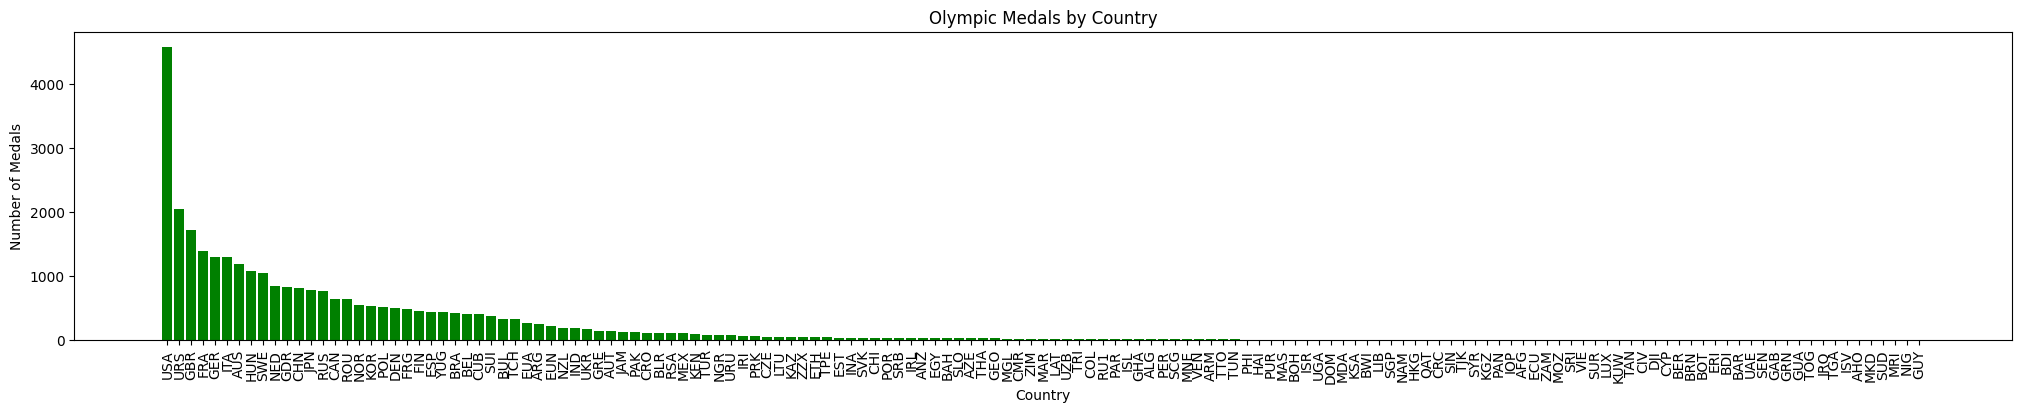

In [26]:
# Format the chart
plt.figure(figsize=(25, 4))

# To plot a bar chart we pass in the 'X' and 'Y' axis information
plt.bar(medalsCountry.index, medalsCountry.values, color='green')
plt.title('Olympic Medals by Country')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=90)
plt.show()

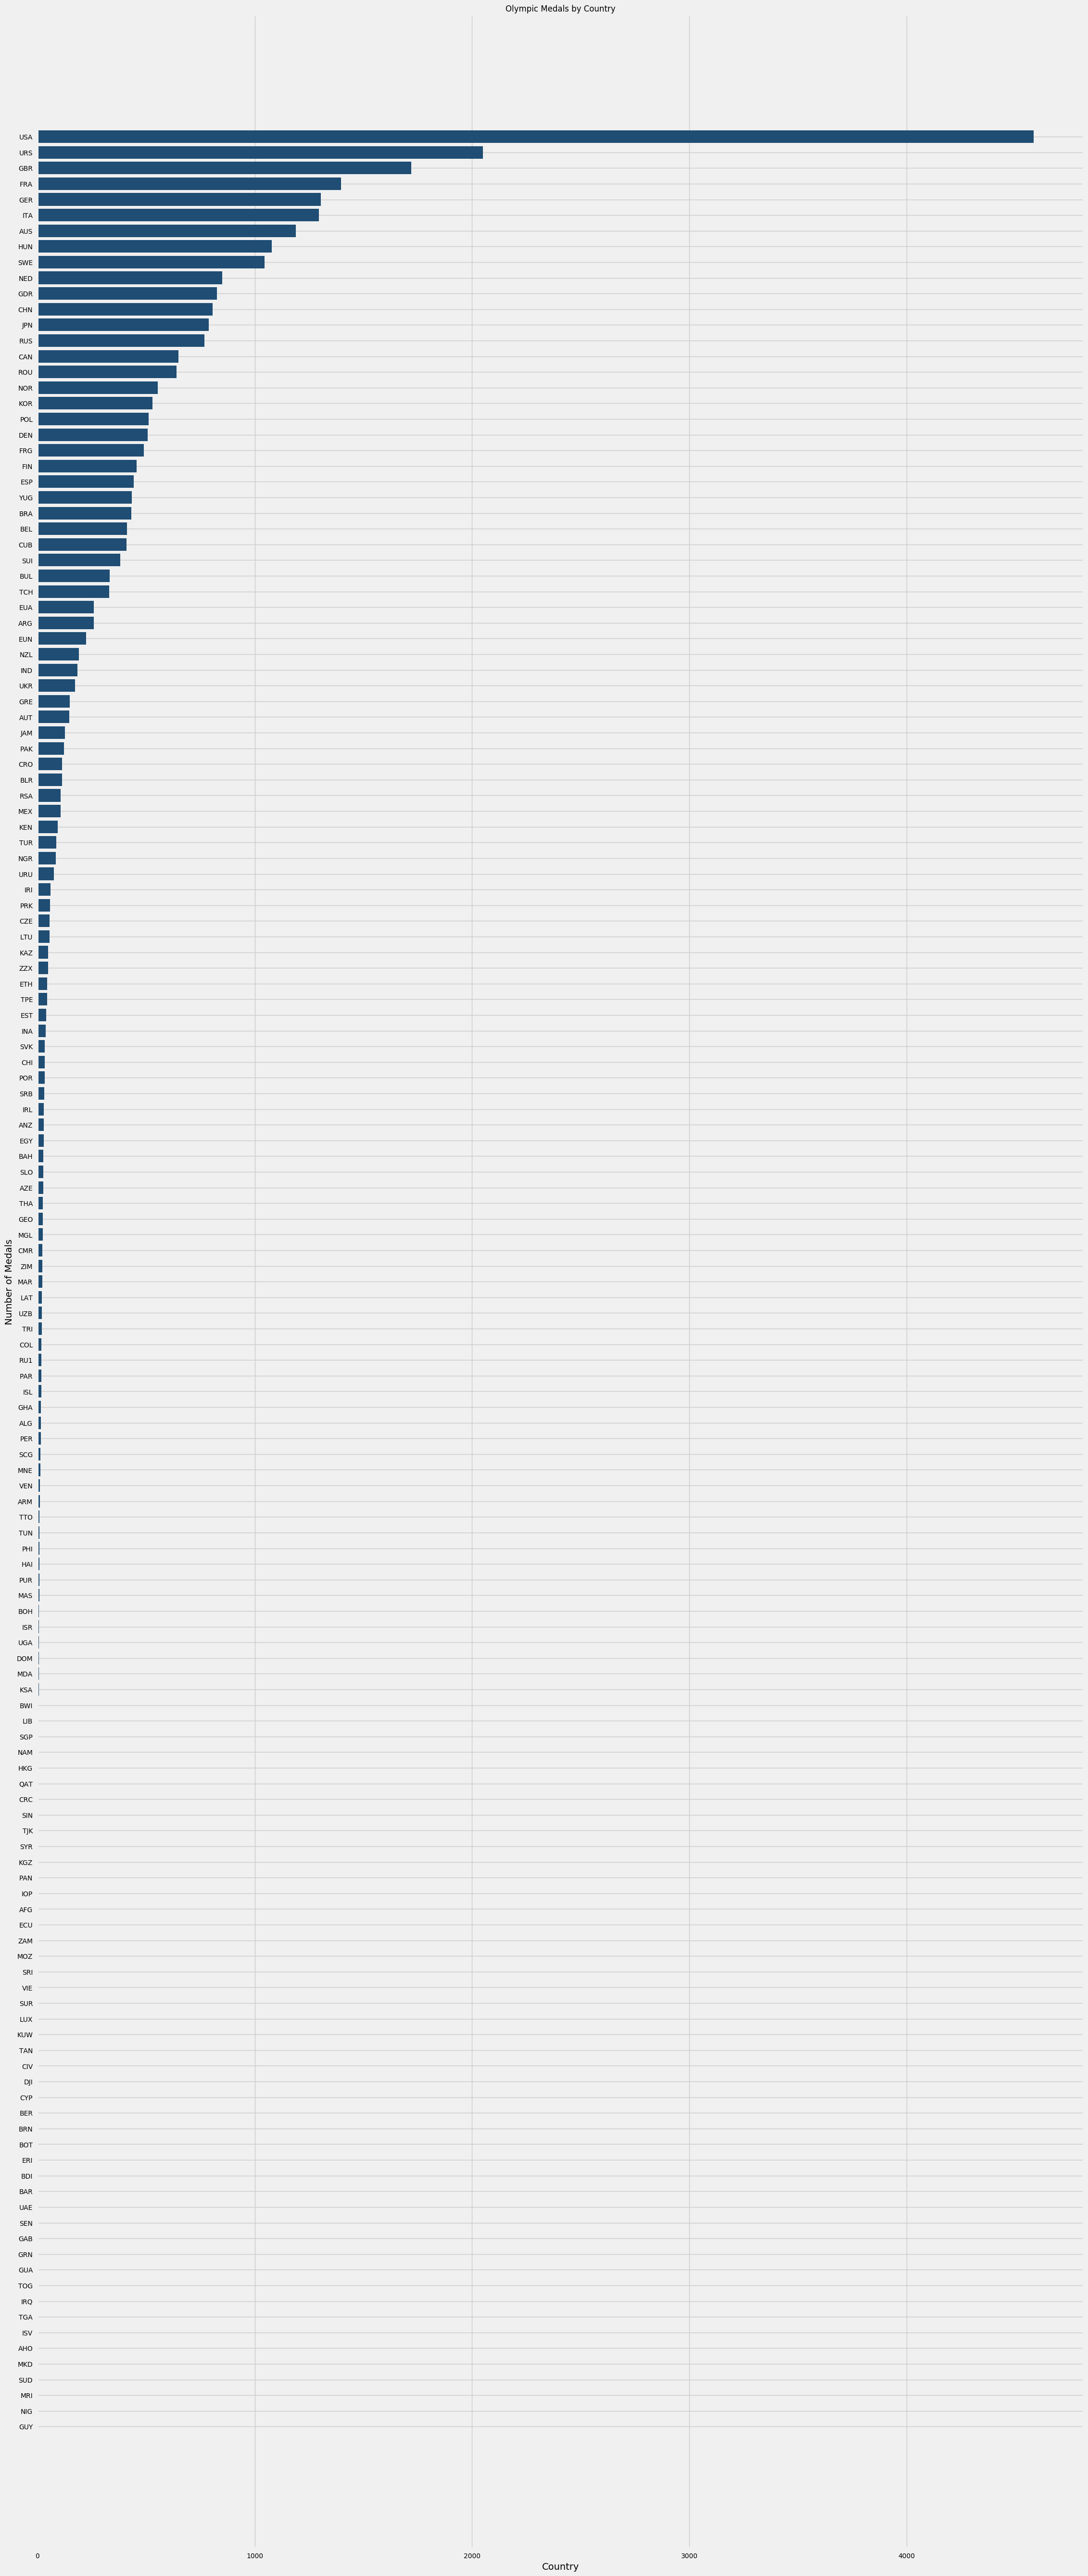

In [56]:
# Rotate to verticle bar chart
# Format the chart
plt.figure(figsize=(25, 65))

# To plot a bar chart we pass in the 'X' and 'Y' axis information
plt.barh(medalsCountry.index, medalsCountry.values, color='#1f4d73')
plt.title('Olympic Medals by Country')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
#plt.xticks(rotation=90)

# Rotate the axis
plt.gca().invert_yaxis()

plt.show()

## Pie Chart

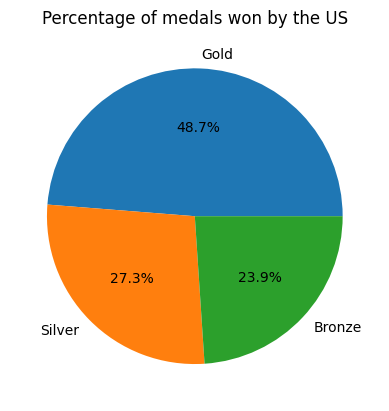

In [28]:
# US results
# Filter the data for only US
us_results_df = resultsDf[resultsDf['Country'] == 'USA']

# Calculate the number of Gold, Silver, and Bronze medals
medal_counts = us_results_df['Medal'].value_counts()

# Creat Pie chart
plt.pie(medal_counts.values, labels=medal_counts.index, autopct='%1.1f%%')

# Title Pie chart
plt.title("Percentage of medals won by the US")

# Show the chart
plt.show()

## Line graphs

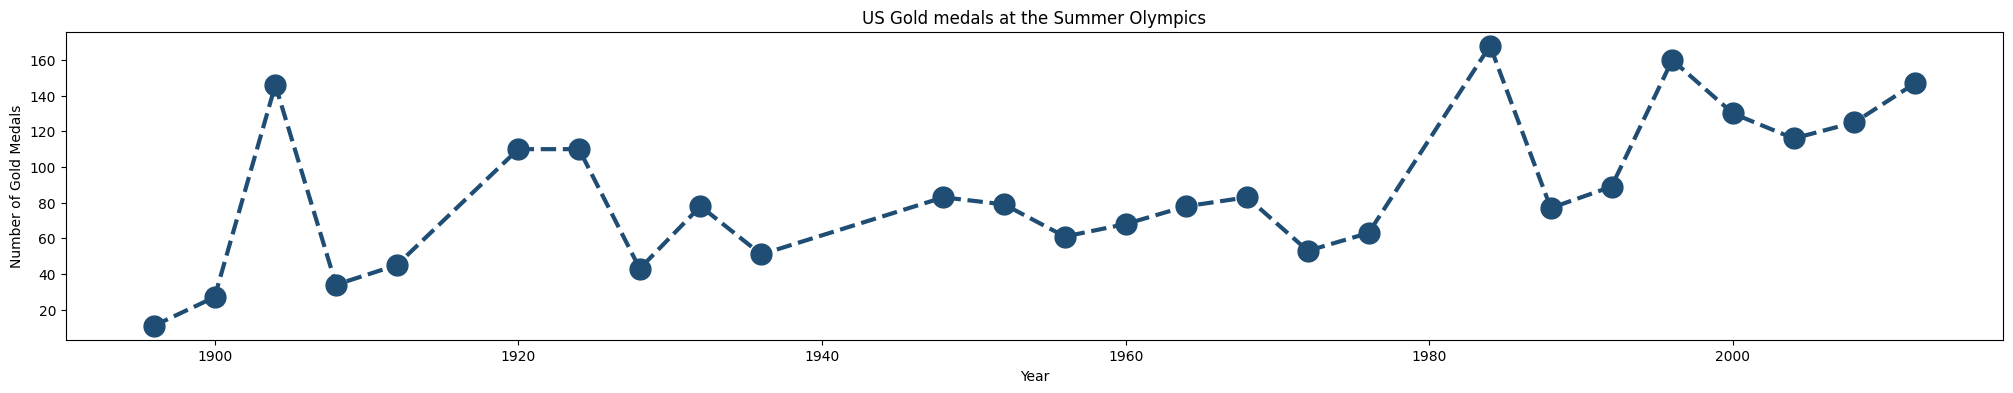

In [39]:
# Display US gold medals over time

# Filter the data for US gold medals
usGold = resultsDf[(resultsDf.Country == 'USA') & (resultsDf.Medal == 'Gold')]

# Group the data to count the number of medals
usGoldYr = usGold.groupby('Year')['Medal'].count()

# Create our line chart
plt.figure(figsize=(25, 4))

#plt.plot(usGoldYr.index, usGoldYr.values)

# Format colors, etc.
#plt.plot(usGoldYr.index, usGoldYr.values, 'b--^')
plt.plot(usGoldYr.index, usGoldYr.values, color='#1f4d73', linestyle='--', marker='.', linewidth=3, markersize=30)

plt.title('US Gold medals at the Summer Olympics')
plt.xlabel('Year')
plt.ylabel('Number of Gold Medals')

plt.show()


### US vs. Other Countries

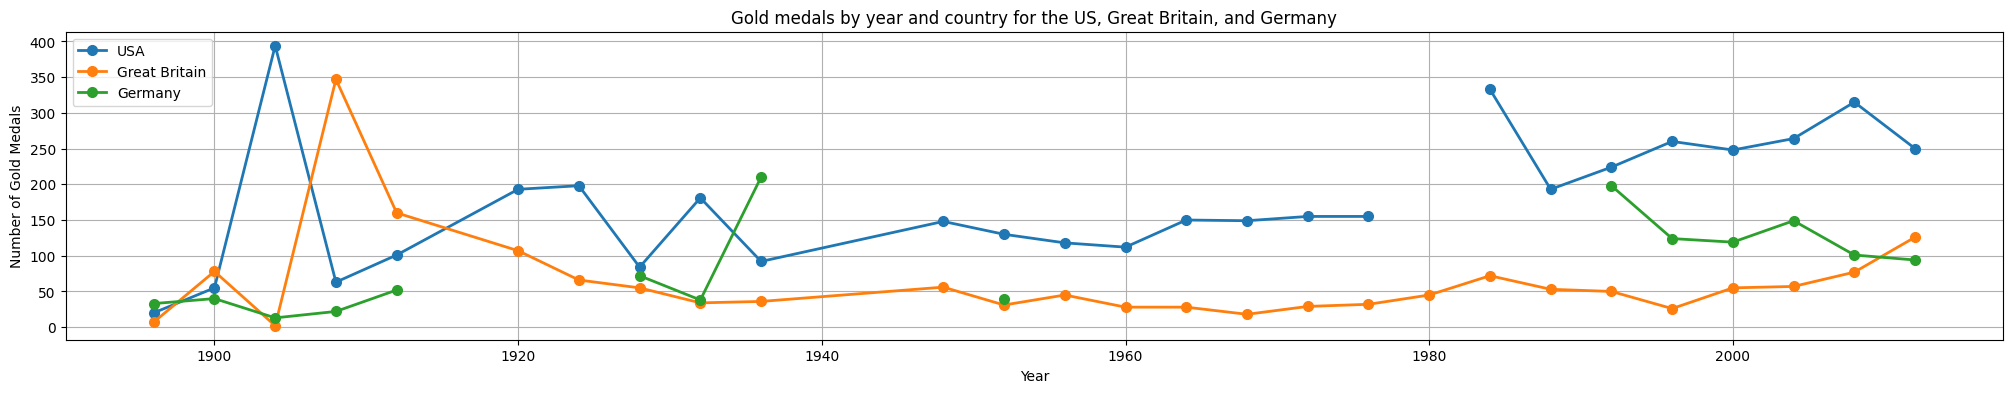

In [43]:
medals_gold = resultsDf[(resultsDf.Country == 'USA') | 
                        (resultsDf.Country == 'GBR') | 
                        (resultsDf.Country == 'GER') | 
                        (resultsDf.Medal == 'Gold')]

# Group the data by year and country and count the number of medals won
medals_by_year_country = medals_gold.groupby(['Year', 'Country']).size().reset_index(name='Gold Medals')

# Create the Pivot table
'''
Syntax:
    df = pd.DataFrame(data)
    pivot_table = df.pivot_table(values='column_to_aggregate',
    index='row_index_column', columns='column_index_column',
    aggfunc='aggregation_cuntion')
'''
# Create a line chart with the data
medals_pivot = medals_by_year_country.pivot(index='Year', columns='Country', values='Gold Medals')

plt.figure(figsize=(25,4))

plt.plot(medals_pivot['USA'], label='USA', marker='o', linewidth=2, markersize=7)
plt.plot(medals_pivot['GBR'], label='Great Britain', marker='o', linewidth=2, markersize=7)
plt.plot(medals_pivot['GER'], label='Germany', marker='o', linewidth=2, markersize=7)
         
plt.title('Gold medals by year and country for the US, Great Britain, and Germany')
plt.xlabel('Year')
plt.ylabel('Number of Gold Medals')
plt.legend()

plt.grid()

plt.show()

In [44]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


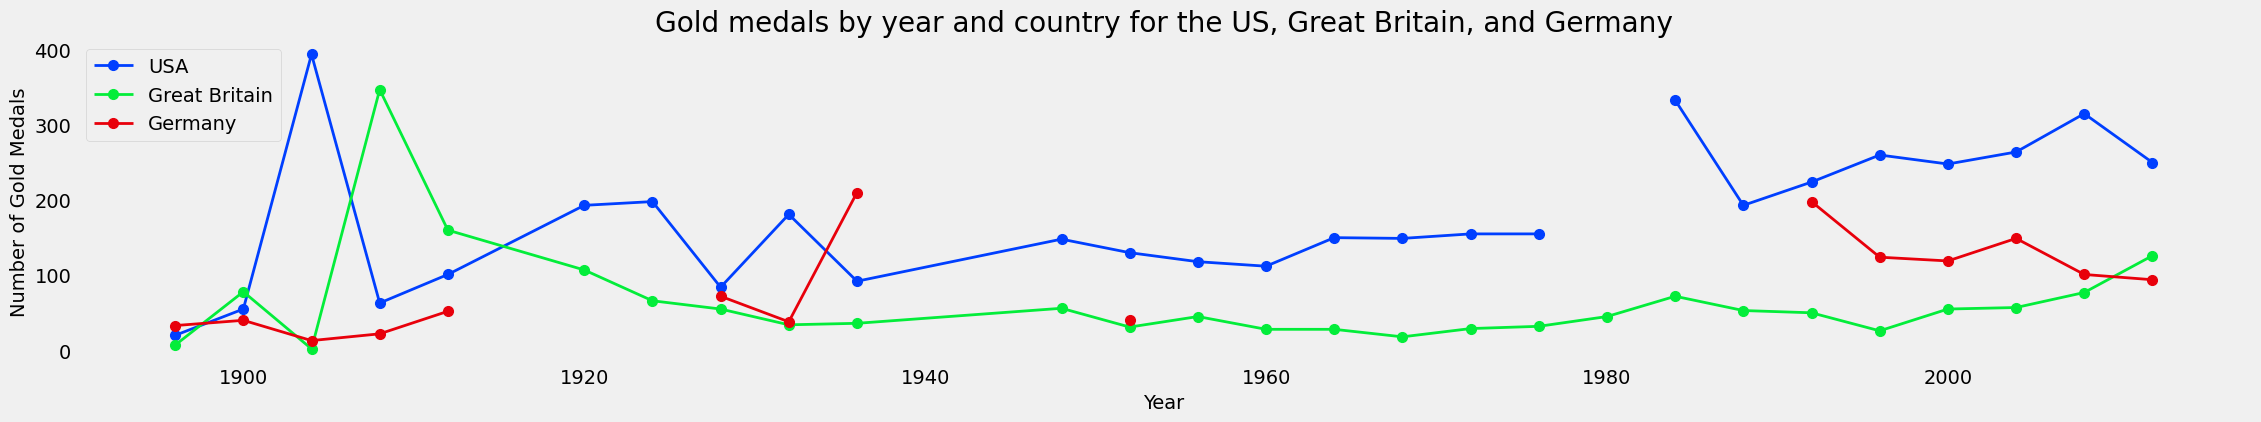

In [46]:
medals_gold = resultsDf[(resultsDf.Country == 'USA') | 
                        (resultsDf.Country == 'GBR') | 
                        (resultsDf.Country == 'GER') | 
                        (resultsDf.Medal == 'Gold')]

# Group the data by year and country and count the number of medals won
medals_by_year_country = medals_gold.groupby(['Year', 'Country']).size().reset_index(name='Gold Medals')

# Create the Pivot table
'''
Syntax:
    df = pd.DataFrame(data)
    pivot_table = df.pivot_table(values='column_to_aggregate',
    index='row_index_column', columns='column_index_column',
    aggfunc='aggregation_cuntion')
'''
# Create a line chart with the data
medals_pivot = medals_by_year_country.pivot(index='Year', columns='Country', values='Gold Medals')

# Set a style for the chart
plt.style.use('seaborn-v0_8-bright')

plt.figure(figsize=(25,4))

plt.plot(medals_pivot['USA'], label='USA', marker='o', linewidth=2, markersize=7)
plt.plot(medals_pivot['GBR'], label='Great Britain', marker='o', linewidth=2, markersize=7)
plt.plot(medals_pivot['GER'], label='Germany', marker='o', linewidth=2, markersize=7)
         
plt.title('Gold medals by year and country for the US, Great Britain, and Germany')
plt.xlabel('Year')
plt.ylabel('Number of Gold Medals')
plt.legend()

plt.grid()

plt.show()

## Scatter Plot

#### Compare US, Sweden, Great Britain, and Canada

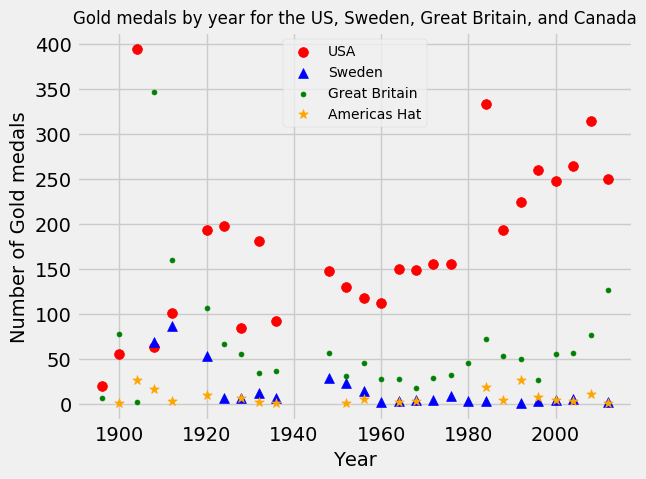

In [50]:
medals_gold = resultsDf[(resultsDf.Country == 'USA') |
                        (resultsDf.Country == 'SWE') |
                        (resultsDf.Country == 'GBR') |
                        (resultsDf.Country == 'CAN') &
                        (resultsDf.Medal == 'Gold')]

# Group our data
medalsByYr = medals_gold.groupby('Year')['Medal'].count()

#Pivot table again
medals_pivot = medals_by_year_country.pivot(index='Year', columns='Country', values = 'Gold Medals')

# Create our scatter plot
# Create a separate plot for each country
plt.scatter(medals_pivot.index, medals_pivot['USA'], label='USA', color='red', marker='o', s=50)
plt.scatter(medals_pivot.index, medals_pivot['SWE'], label='Sweden', color='blue', marker='^', s=50)
plt.scatter(medals_pivot.index, medals_pivot['GBR'], label='Great Britain', color='green', marker='.', s=50)
plt.scatter(medals_pivot.index, medals_pivot['CAN'], label='Americas Hat', color='orange', marker='*', s=50)

#Style
plt.style.use('seaborn-v0_8-notebook')
plt.title('Gold medals by year for the US, Sweden, Great Britain, and Canada')
plt.xlabel('Year')
plt.ylabel('Number of Gold medals')
plt.legend()
          
plt.show()

#### Seaborn example

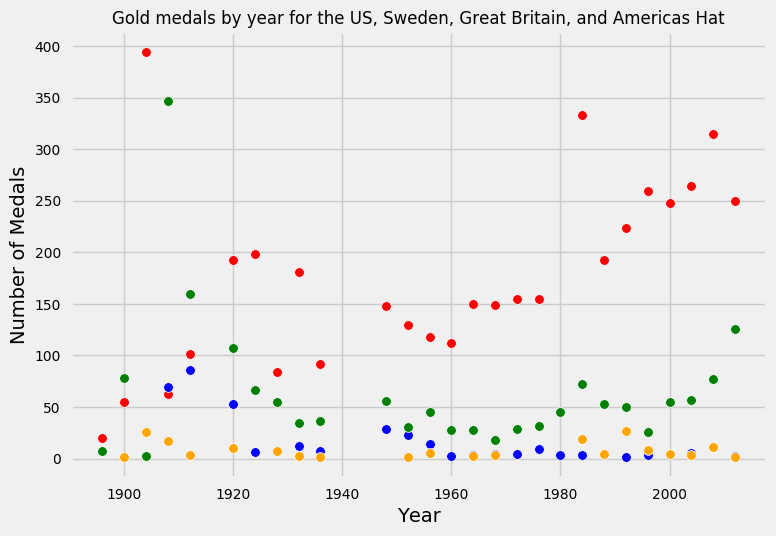

In [54]:
medals_gold = resultsDf[(resultsDf.Country == 'USA') |
                        (resultsDf.Country == 'SWE') |
                        (resultsDf.Country == 'GBR') |
                        (resultsDf.Country == 'CAN') &
                        (resultsDf.Medal == 'Gold')]

# Group our data
medalsByYr = medals_gold.groupby('Year')['Medal'].count()

# Specific Seaborn syntax
sns.scatterplot(data=medals_by_year_country[medals_by_year_country['Country'] == 'USA'], x='Year', y='Gold Medals', color='red')
sns.scatterplot(data=medals_by_year_country[medals_by_year_country['Country'] == 'SWE'], x='Year', y='Gold Medals', color='blue')
sns.scatterplot(data=medals_by_year_country[medals_by_year_country['Country'] == 'GBR'], x='Year', y='Gold Medals', color='green')
sns.scatterplot(data=medals_by_year_country[medals_by_year_country['Country'] == 'CAN'], x='Year', y='Gold Medals', color='orange')
                
#Format
plt.title('Gold medals by year for the US, Sweden, Great Britain, and Americas Hat')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
                
plt.show()